In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np


In [148]:


# precision = json.loads(open('../data/metrics/precision_finetuned_4o-mini_sampling.json', 'r').read())
# recall = json.loads(open('../data/metrics/recall_finetuned_4o-mini_sampling.json', 'r').read())
# f1 = json.loads(open('../data/metrics/f1_finetuned_4o-mini_sampling.json', 'r').read())


# precision = json.loads(open('../data/metrics/precision_old.json', 'r').read())
# recall = json.loads(open('../data/metrics/recall_old.json', 'r').read())
# f1 = json.loads(open('../data/metrics/f1_old.json', 'r').read())

#extrntion = "sampling_filtered"
#extrntion = "finetuned_4o-mini_sampling"
#extrntion = "uniform_sampling"
#extrntion = "sampling"
extrntion = "sampling_lrm1"
#extrntion = "sampling_filtered"
#extrntion = "raw_4o-mini"


precision = json.loads(open(f'../data/metrics/precision_{extrntion}.json', 'r').read())
recall = json.loads(open(f'../data/metrics/recall_{extrntion}.json', 'r').read())
f1 = json.loads(open(f'../data/metrics/f1_{extrntion}.json', 'r').read())
fpr = json.loads(open(f'../data/metrics/fpr_{extrntion}.json', 'r').read())
specificity = json.loads(open(f'../data/metrics/specificity_{extrntion}.json', 'r').read())

# extrntion2 = "uniform_sampling"


# precision_2 = json.loads(open(f'../data/metrics/precision_{extrntion2}.json', 'r').read())
# recall_2 = json.loads(open(f'../data/metrics/recall_{extrntion2}.json', 'r').read())
# f1_2 = json.loads(open(f'../data/metrics/f1_{extrntion2}.json', 'r').read())

pdf = pd.DataFrame(precision).fillna(0).astype(float).T
rdf = pd.DataFrame(recall).fillna(0).astype(float).T
fdf = pd.DataFrame(f1).fillna(0).astype(float).T
fpr_df = pd.DataFrame(fpr).fillna(0).astype(float).T
specificity_df = pd.DataFrame(specificity).fillna(0).astype(float).T

# pdf2 = pd.DataFrame(precision_2).fillna(0).astype(float).T
# rdf2 = pd.DataFrame(recall_2).fillna(0).astype(float).T
# fdf2 = pd.DataFrame(f1_2).fillna(0).astype(float).T

# pdf -= pdf2

v = fpr_df.values

print(np.std(v))
print(np.mean(v))
print(np.min(v))
print(np.quantile(v, 0.25))
print(np.quantile(v, 0.50))
print(np.quantile(v, 0.75))
print(np.max(v))

0.1489585704790433
0.14330447770112503
0.0
0.05263157894736842
0.07526881720430108
0.19566993464052287
0.5945945945945946


In [149]:
pdf['(mean)'] = pdf.T.mean().astype(float)
pdf.loc['(mean)'] = pdf.mean().astype(float)

rdf['(mean)'] = rdf.T.mean().astype(float)
rdf.loc['(mean)'] = rdf.mean().astype(float)

fdf['(mean)'] = fdf.T.mean().astype(float)
fdf.loc['(mean)'] = fdf.mean().astype(float)

fpr_df['(mean)'] = fpr_df.T.mean().astype(float)
fpr_df.loc['(mean)'] = fpr_df.mean().astype(float)

specificity_df['(mean)'] = specificity_df.T.mean().astype(float)
specificity_df.loc['(mean)'] = specificity_df.mean().astype(float)

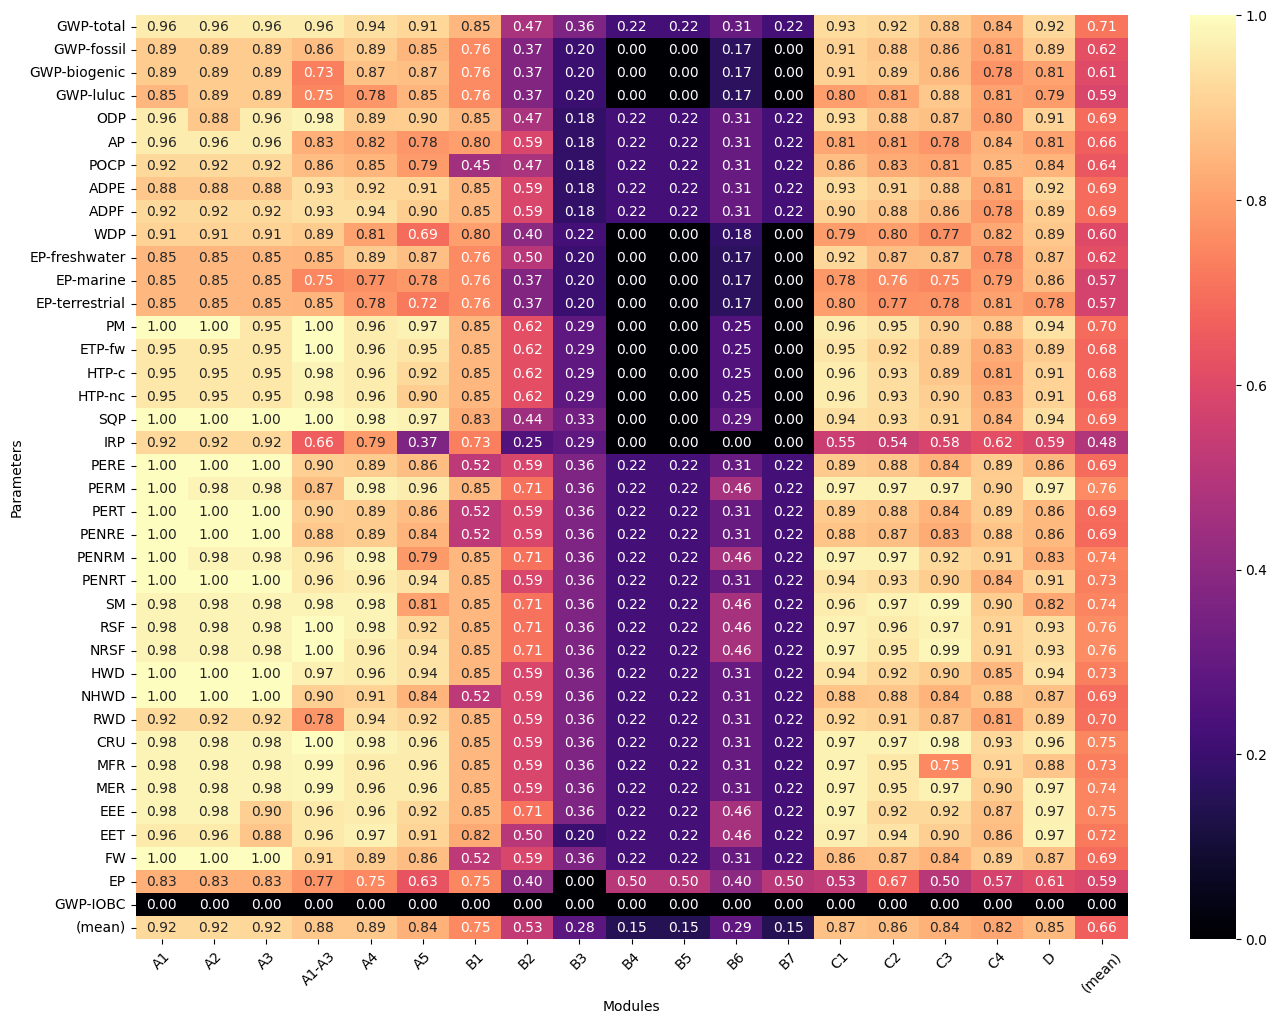

In [152]:

# Set figure size
plt.figure(figsize=(16, 12))

# Create heatmap
sns.heatmap(fdf, annot=True, fmt=".2f", cmap="magma", linewidths=0.0, vmin=-0.0, vmax=1.0)
#sns.heatmap(fdf, annot=True, fmt=".2f", cmap="magma", linewidths=0.0)

plt.xticks(rotation=45)
plt.xlabel("Modules")
plt.ylabel("Parameters")

#plt.savefig(f'../figs/precision_{extrntion}.png', dpi=300, bbox_inches='tight')
#plt.savefig(f'../figs/f1_{extrntion}.png', dpi=300, bbox_inches='tight')

plt.show()

In [23]:
import os


max_shit = set(os.listdir('../data/max_testset'))
my_shit = set(os.listdir('../data/nice_epds'))
my_output = set(os.listdir('../data/output_uniform_sampling'))


In [27]:
max_shit - my_output 

set()

In [39]:
import random


with open('../data/dataset/train4000_2025-04-15.jsonl', 'r') as file:
    lines = list(file)
    
random.shuffle(lines)

with open("../data/dataset/train1000_2025-04-15.jsonl", 'w') as file:
    for line in lines[:1000]:
        file.write(line)

In [40]:
with open('../data/dataset/train4000_2025-04-15_sampled.jsonl', 'r') as file:
    lines = list(file)
    
random.shuffle(lines)

with open("../data/dataset/train1000_2025-04-15_sampled.jsonl", 'w') as file:
    for line in lines[:1000]:
        file.write(line)

In [43]:
with open('../data/dataset/val1000_2025-04-15.jsonl', 'r') as file:
    lines = list(file)
    
random.shuffle(lines)

with open("../data/dataset/val200_2025-04-15.jsonl", 'w') as file:
    for line in lines[:200]:
        file.write(line)